In [16]:
library("DataComputing")
library(repr)

options(repr.plot.width=10, repr.plot.height=5)

In [17]:
head(Birthdays)

state year month day       date wday births
1    AK 1969     1   1 1969-01-01  Wed     14
2    AL 1969     1   1 1969-01-01  Wed    174
3    AR 1969     1   1 1969-01-01  Wed     78
4    AZ 1969     1   1 1969-01-01  Wed     84
5    CA 1969     1   1 1969-01-01  Wed    824
6    CO 1969     1   1 1969-01-01  Wed    100

### Births vs Date

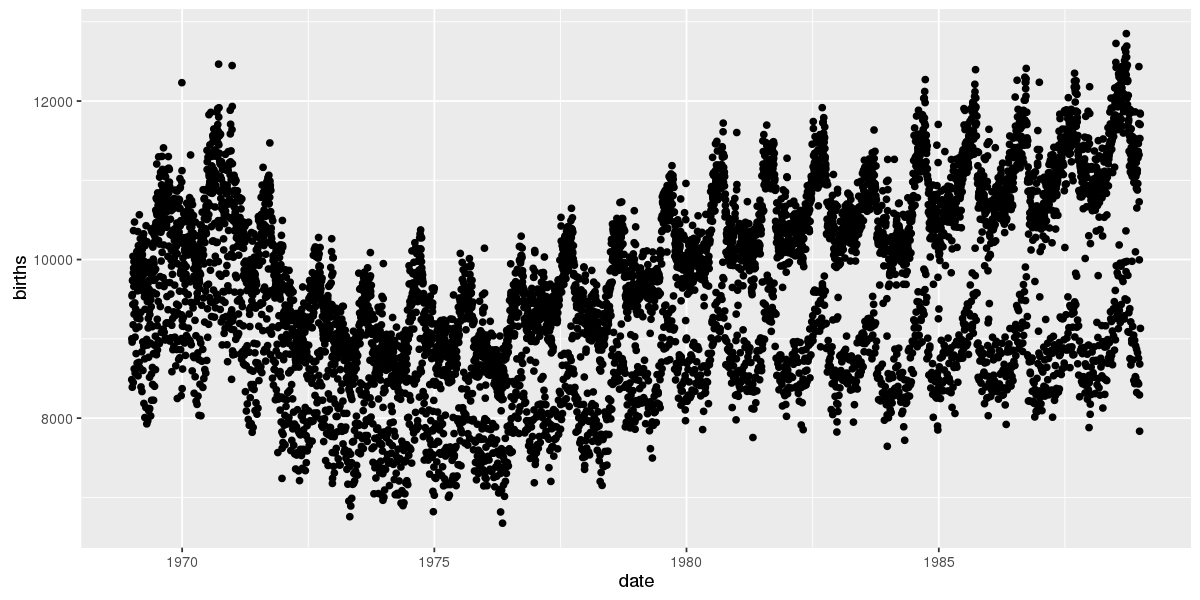

In [18]:
DailyBirths = Birthdays %>%
    group_by(date) %>%
    summarize(births = sum(births))

ggplot(DailyBirths, aes(x=date, y=births)) +
    geom_point()

## Births vs Week in the Year

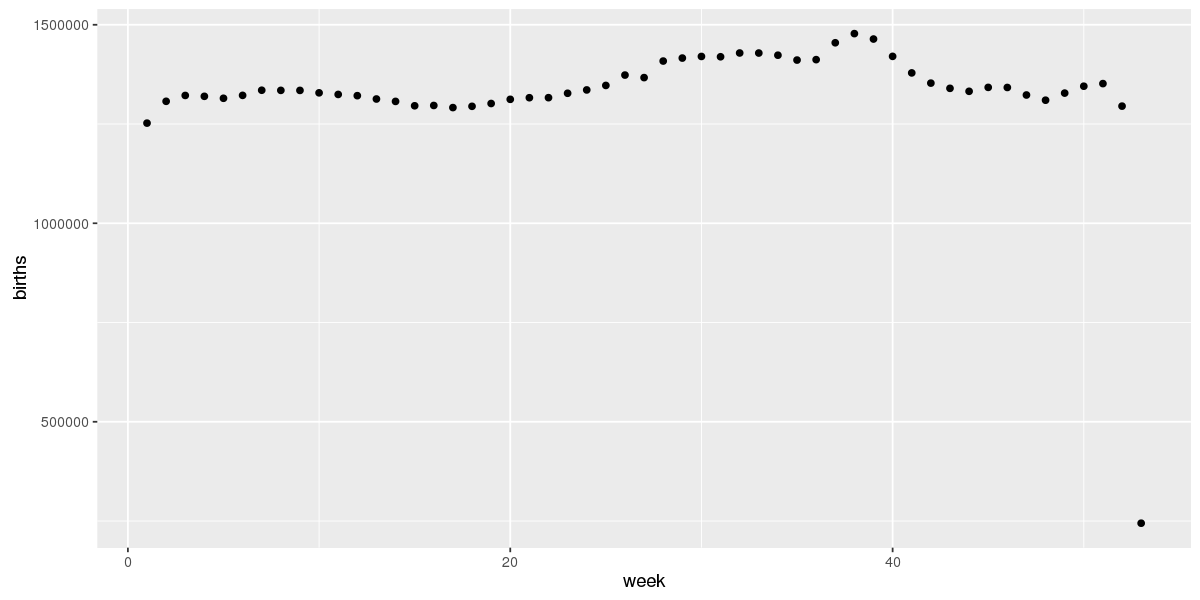

In [19]:
WeeklyBirths = Birthdays %>%
    mutate(week=week(date)) %>%
    group_by(week) %>%
    summarize(births = sum(births))

ggplot(WeeklyBirths, aes(x=week, y=births)) +
    geom_point()

## Births vs Month in the Year

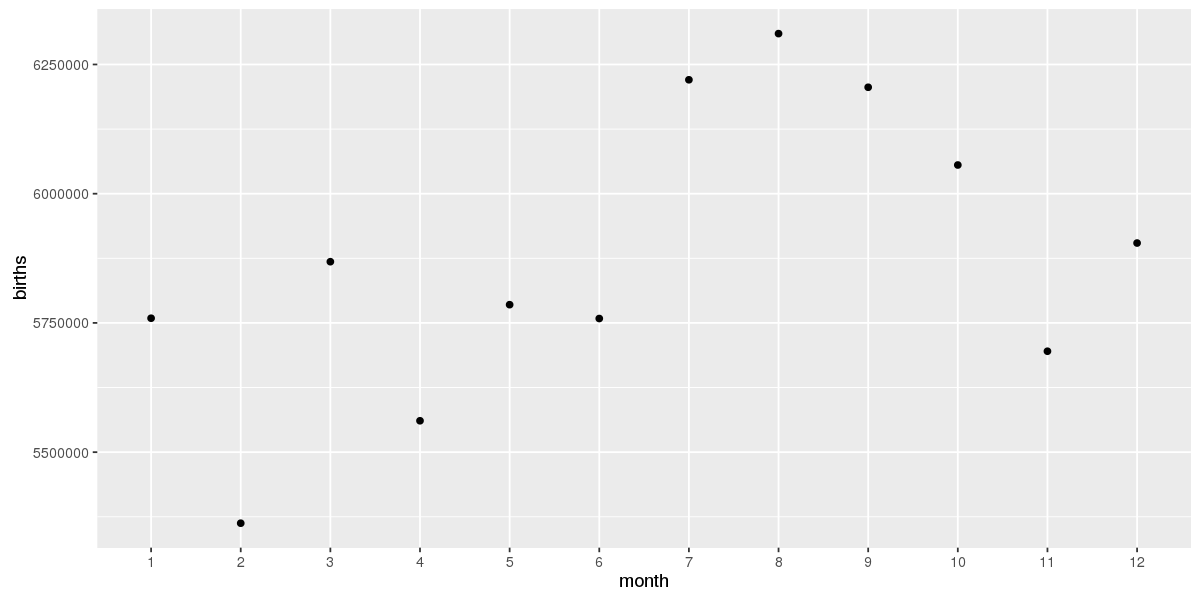

In [20]:
MonthlyBirths = Birthdays %>%
    mutate(month=month(date)) %>%
    group_by(month) %>%
    summarize(births = sum(births))

ggplot(MonthlyBirths, aes(x=month, y=births)) +
    geom_point() +
    scale_x_discrete()

## Births vs Julian Day

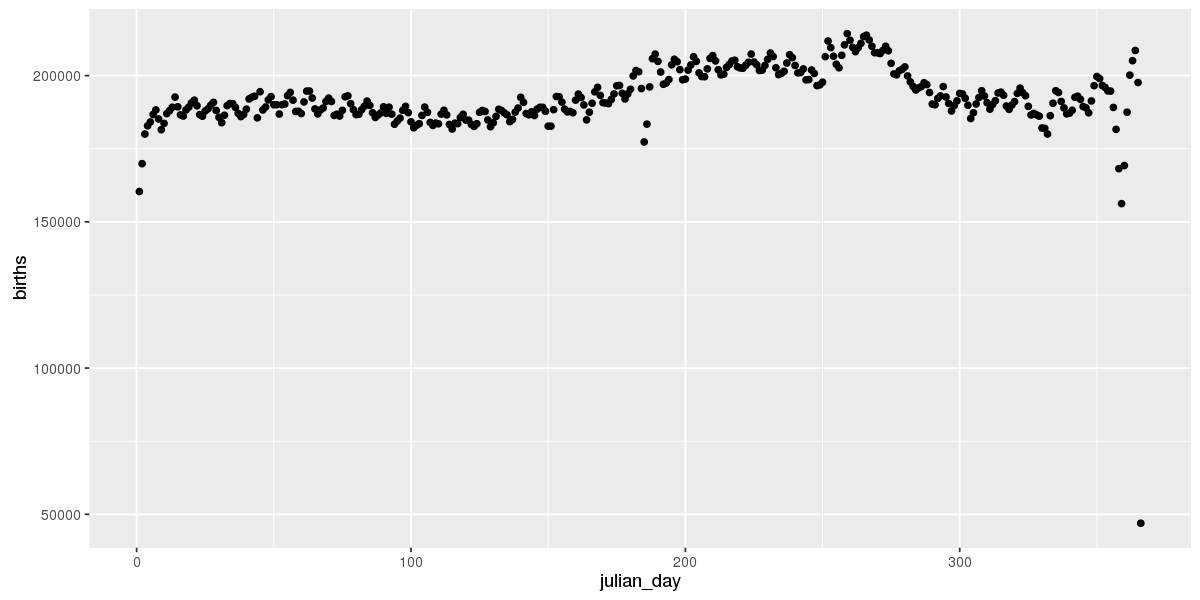

In [21]:
JulianBirths = Birthdays %>%
    mutate(julian_day=yday(date)) %>%
    group_by(julian_day) %>%
    summarize(births = sum(births))

ggplot(JulianBirths, aes(x=julian_day, y=births)) +
    geom_point()

## Briths vs Day in the Week

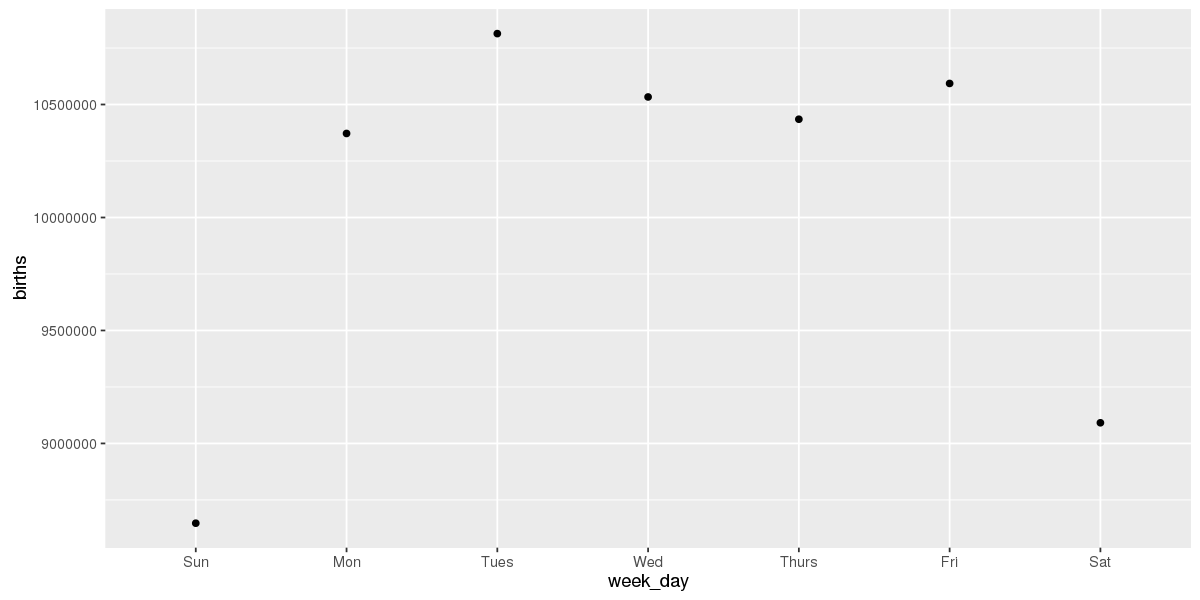

In [22]:
WeekDayBirths = Birthdays %>%
    mutate(week_day=wday(date, label=T)) %>%
    group_by(week_day) %>%
    summarize(births = sum(births))

ggplot(WeekDayBirths, aes(x=week_day, y=births)) +
    geom_point()

## 1980-1981 Two Year Analysis

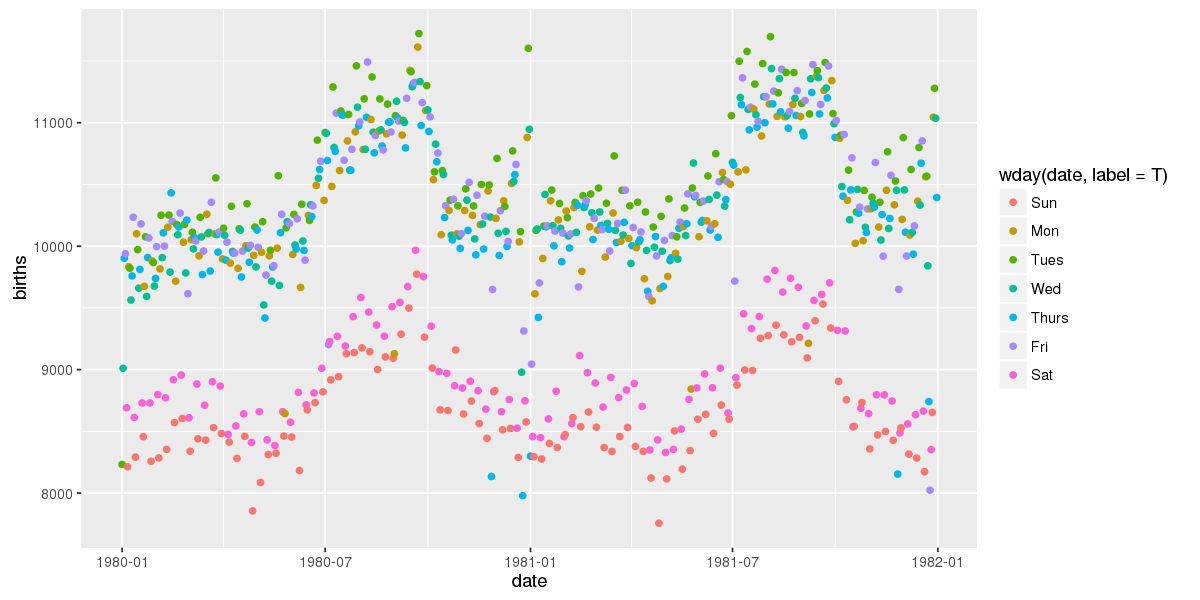

In [23]:
MyTwoYears = Birthdays %>%
    filter(year == 1980 | year == 1981) %>%
    group_by(date) %>%
    summarize(births = sum(births))

ggplot(MyTwoYears, aes(x=date, y=births, col=wday(date, label=T))) +
    geom_point()

We see that the birth rate on Saturday and Sunday is proportionally lower than that of other days in the week.

In [34]:
Holidays = read.csv("http://www.mosaic-web.org/go/datasets/DCF/US-Holidays.csv") %>%
    mutate(date=lubridate::dmy(date))

HolidayTwoYears = Holidays %>%
    filter(year == 1980 | year == 1981) %>%
    select(holiday, date)

head(HolidayTwoYears)


holiday       date
1  New Year's Day 1980-01-01
2  New Year's Day 1981-01-01
3 President's Day 1980-02-18
4 President's Day 1981-02-16
5    Memorial Day 1980-05-26
6    Memorial Day 1981-05-25

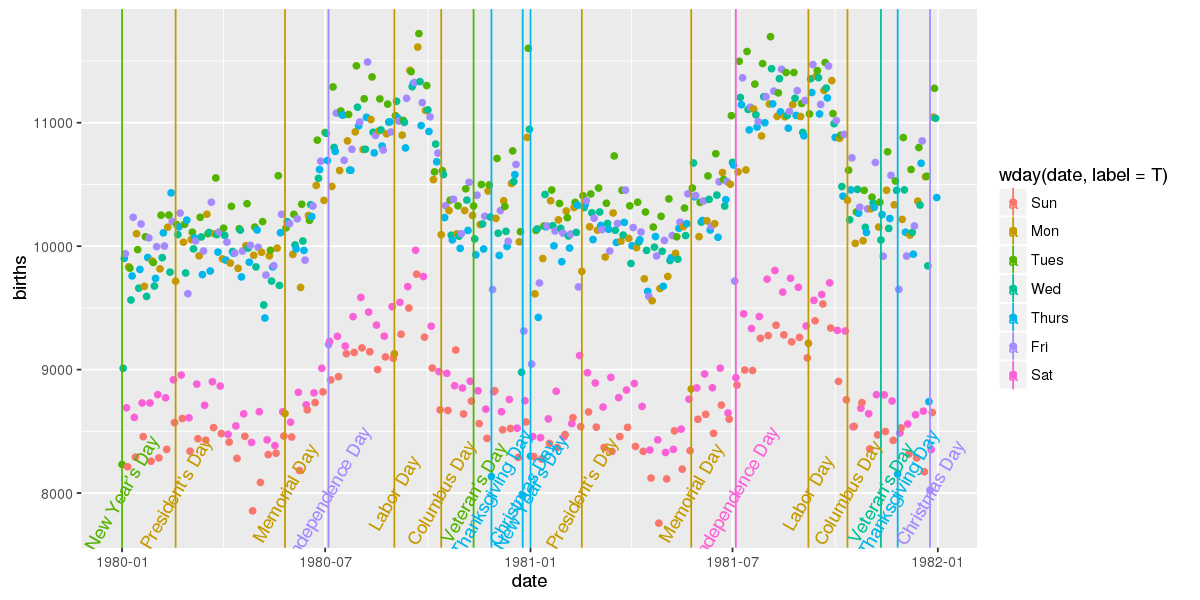

In [35]:
ggplot(MyTwoYears, aes(x=date, y=births, col=wday(date, label=T))) +
    geom_point() +
    geom_vline(data=HolidayTwoYears, aes(xintercept = as.numeric(date), col=wday(date, label=T))) + 
    geom_text(data=HolidayTwoYears, aes(label=holiday, y=8000, angle=60))

In [39]:
MyTwoYearsWithHolidays = MyTwoYears %>%
    left_join(HolidayTwoYears, by="date")

head(MyTwoYearsWithHolidays)

MyTwoYearsWithHolidays = MyTwoYearsWithHolidays %>%
    mutate(holiday = ifelse(is.na(holiday), "no", "yes"))

head(MyTwoYearsWithHolidays)

Source: local data frame [6 x 3]

        date births        holiday
      (time)  (int)         (fctr)
1 1980-01-01   8232 New Year's Day
2 1980-01-02   9011             NA
3 1980-01-03   9902             NA
4 1980-01-04   9939             NA
5 1980-01-05   8691             NA
6 1980-01-06   8213             NA

Source: local data frame [6 x 3]

        date births holiday
      (time)  (int)   (chr)
1 1980-01-01   8232     yes
2 1980-01-02   9011      no
3 1980-01-03   9902      no
4 1980-01-04   9939      no
5 1980-01-05   8691      no
6 1980-01-06   8213      no

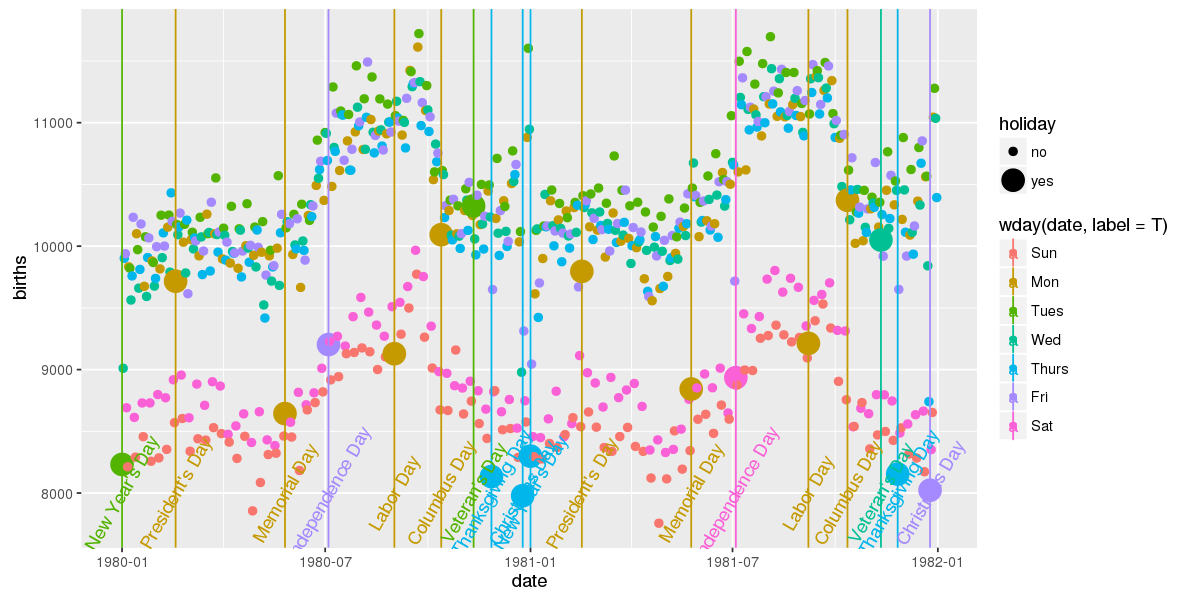

In [46]:
ggplot(MyTwoYearsWithHolidays) +
    geom_point(aes(x=date, y=births, col=wday(date, label=T), size=holiday)) +
    geom_vline(data=HolidayTwoYears, aes(xintercept = as.numeric(date), col=wday(date, label=T))) + 
    geom_text(data=HolidayTwoYears, aes(x=date, label=holiday, y=8000, angle=60, col=wday(date, label=T)))

Almost right. Days that are not following the pattern are president's day, Columbus day and veteran's day.